In [54]:
import os, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

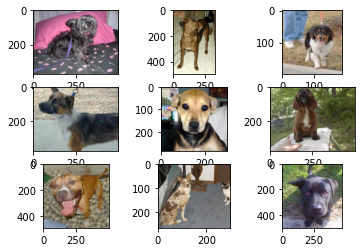

In [2]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

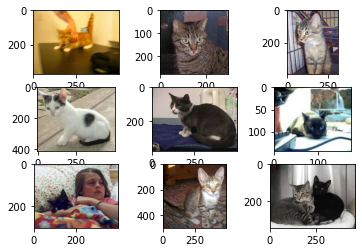

In [21]:
# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'cat.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [31]:
#print grayscale image 
folder = 'train/'

	# define filename
filename = folder + 'cat.' + str(0) + '.jpg'
image = imread(filename)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

resized_img = cv2.resize(gray_img, (50,50))


cv2.imshow('Grayscale', gray_image)
cv2.waitKey(0) 
 
# Window shown waits for any key pressing event
cv2.destroyAllWindows()

In [69]:
def readImg_gray(file_path):
    img = imread(file_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray_img, (128,128))
    return resized_img

In [70]:
def pre(name, num):    
    m=12500
    n_x = 128*128
    X = np.ndarray((m,n_x), dtype=np.uint8)
    y = np.zeros((m,1))
    folder = 'train/'
    for i in range(m):
        img = readImg_gray(folder + name+ '.' + str(i) + '.jpg')
        X[i,:] = np.squeeze(img.reshape((n_x,1)))
        y[i,0] = num
    return X,y

In [71]:
#gray
X1,y1 = pre('cat',0)
cat_df = pd.DataFrame(X1)
cat_df.shape

(12500, 16384)

In [72]:
cat_df['label'] = y1

In [73]:
#gray
X2,y2 = pre('dog',1)
dog_df = pd.DataFrame(X2)
dog_df.shape

(12500, 16384)

In [74]:
dog_df['label'] = y2

In [75]:
#gray
df = pd.concat([cat_df, dog_df])
df.shape

(25000, 16385)

In [76]:
#gray
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,145,151,152,157,159,162,164,167,168,170,...,1,1,1,1,1,1,1,1,1,0.0
1,43,45,45,62,42,47,41,43,43,44,...,48,55,44,68,66,71,47,36,33,0.0
2,50,54,36,58,46,124,164,173,200,190,...,32,49,53,52,45,43,33,30,192,0.0
3,123,119,109,104,142,173,166,165,167,102,...,152,181,147,199,132,124,151,161,161,0.0
4,129,143,147,152,159,160,167,167,167,172,...,10,13,10,12,11,12,13,14,15,0.0


In [77]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
12495,29,26,33,54,77,88,88,84,82,83,...,121,123,127,125,120,112,117,113,89,1.0
12496,34,35,45,43,51,40,35,30,28,23,...,90,71,87,67,117,108,53,47,49,1.0
12497,219,207,207,137,135,113,97,90,68,61,...,165,161,150,151,153,157,162,162,149,1.0
12498,199,206,209,213,215,217,217,219,219,220,...,46,36,48,40,92,48,37,89,37,1.0
12499,196,204,201,192,196,197,204,204,197,201,...,108,110,74,116,116,70,101,125,99,1.0


In [78]:
y3 = df['label']
X3 = df.drop(['label'], axis=1).to_numpy()

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.3, random_state=42)

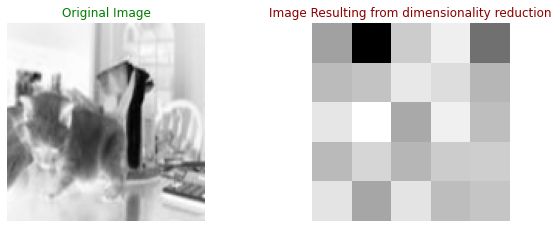

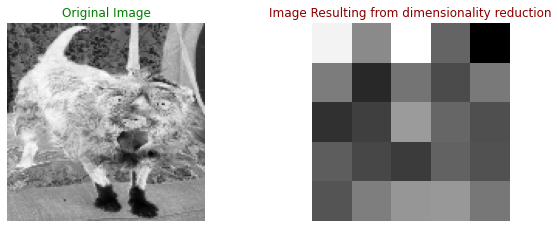

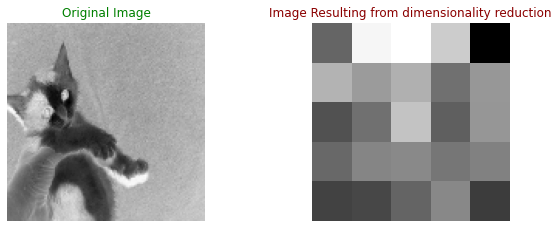

In [100]:
## pca = PCA(n_components=25)
X_train_reduced = pca.fit_transform(X_train)

for i in range(3):
    plt.figure(figsize=(10, 8))
    plt.subplot(2, 2, 1)
    plt.imshow(X_test[i].reshape(128,128), cmap="gist_yarg")
    plt.title("Original Image", color = "green")
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.imshow(X_train_reduced[i].reshape(5,5), cmap="gist_yarg")
    plt.title("Image Resulting from dimensionality reduction", color = "Darkred")
    plt.axis("off")
    plt.show()

In [96]:
#pipeLine function: scale by StandardScaler, dimensionality reduction by PCA, call a model
def pipeLine(model):
    pipeline = Pipeline([('scaler1', StandardScaler()),
                        ('pca1', PCA(n_components=200)),
                        ('mod', model)])
    return pipeline

In [97]:
#pipeline - fit & score
def pipe(model):
    p = pipeLine(model)
    p.fit(X_train, y_train)
    return round(p.score(X_test, y_test),4)

In [89]:
lr = pipe(LogisticRegression())
lr

0.5663

In [90]:
rf = pipe(RandomForestClassifier())
rf

0.624

In [91]:
knn = pipe(KNeighborsClassifier(n_neighbors=7))
knn

0.5968

In [92]:
ada = pipe(AdaBoostClassifier(random_state=70, n_estimators=200, learning_rate=0.2, algorithm='SAMME'))
ada

0.5939

In [98]:
xgb = pipe(XGBClassifier())
xgb

C:\Users\PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:53:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6271

In [95]:
#voting
pipeline = Pipeline([
    ('scaler1', StandardScaler()),
    ('pca1', PCA(n_components=15)),
    ('clf', VotingClassifier([
        ('rf', RandomForestClassifier()),
        ('knn',KNeighborsClassifier(n_neighbors=7)),
        ('xgb', XGBClassifier()),
        ('lr', LogisticRegression())],voting='soft')), ])

pipeline.fit(X_train, y_train)
round(pipeline.score(X_test, y_test),4)

C:\Users\PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:50:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6192

In [99]:
#stacking
pipeline = Pipeline([
    ('scaler1', StandardScaler()),
    ('pca1', PCA(n_components=15)),
    ('stack', StackingClassifier([
        ('rf', RandomForestClassifier()),    
        ('knn', KNeighborsClassifier(n_neighbors=7))]))])

pipeline.fit(X_train, y_train)
round(pipeline.score(X_test, y_test),4)

0.6148